# 建筑面积（加上街道网络）

使用OSMnx下载OpenStreetMap建筑图形，并将它们可视化为地图。

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

In [2]:
# configure the inline image display 配置图形参数
img_folder = 'images'
extension = 'png'
size = 240

在北京交通大学范围内的建筑足迹

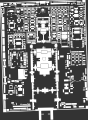

In [3]:
gdf = ox.footprints.footprints_from_place(place='Forbidden City,Beijing,CN',)
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', 
                            save=True, show=False, close=True, filename='piedmont_bldgs', dpi=40)
Image('{}/{}.{}'.format(img_folder, 'piedmont_bldgs', extension), height=size, width=size)

In [5]:
# 保存成shp文件
gdf_save = gdf.drop(labels='nodes', axis=1)
gdf_save.to_file('data/gugong_building')

### 现在让我们分析建筑物占地面积的大小...

In [6]:
# 计算每个建筑物占地面积的投影单位（米）面积，然后显示前五个
areas = gdf_proj.area
areas.head()

8854306     12459.359869
8854349       693.016543
8861194       370.377047
40343947     2134.096197
40343948     1375.313977
dtype: float64

In [7]:
# 建筑占地面积所覆盖的总面积(单位：平方米)
sum(areas)

284441.89557120897

In [8]:
# 获取xx 内的总面积
place = ox.gdf_from_place('Beijing Jiaotong University,Beijing,CN')
place_proj = ox.project_gdf(place)
place_proj.area.iloc[0]

390576.0294399316

In [9]:
#建筑面积占总面积的比例
sum(areas) / place_proj.area.iloc[0]

0.7282625510302969

# 天安门附近

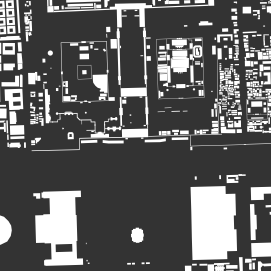

In [10]:
point = (39.90726,116.39131)
dist = 612
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                            save=True, show=False, close=True, filename='paris_bldgs', dpi=90)
Image('{}/{}.{}'.format(img_folder, 'paris_bldgs', extension), height=size, width=size)

Street network +building footprints:平方英里的可视化

In [11]:
# 定义函数来获取1平方公里的街道路网，建筑面积图并进行绘制
def make_plot(place, point, network_type='drive', bldg_color='orange', dpi=40,
              dist=1000, default_width=4, street_widths=None):
    gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

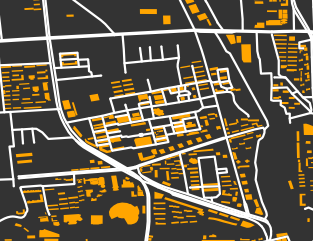

In [12]:
place = 'BJTU'
point = (39.9501,116.3372)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)